In [23]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Loading
df = pd.read_csv("./sample_data/data_jobs.csv")

In [25]:
# Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

In [26]:
df_FR = df[df["job_country"] == "France"]

In [27]:
df_FR["job_posted_monthly"] = df_FR.loc[:,"job_posted_date"].dt.strftime("%B")

C:\Users\lambe\AppData\Local\Temp\ipykernel_16912\1613381638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FR["job_posted_monthly"] = df_FR.loc[:,"job_posted_date"].dt.strftime("%B")


In [28]:
df_FR

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_monthly
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,NaN,NaN,NaN,Engie,"['sql', 'php', 'excel', 'power bi', 'sap', 'ji...","{'analyst_tools': ['excel', 'power bi', 'sap']...",December
21,Data Scientist,Stage - data scientist – génération ia de donn...,"Asnières-sur-Seine, France",via Jobijoba,Full-time,False,France,2023-02-23 13:41:21,False,False,France,NaN,NaN,NaN,Credit Agricole,NaN,NaN,February
22,Data Engineer,Data Engineer / Développeur·euse Big Data F/H,"Nantes, France",via LinkedIn,Full-time,False,France,2023-09-05 13:16:18,False,False,France,NaN,NaN,NaN,onepoint,"['sql', 'scala', 'java', 'python', 'mongodb', ...","{'cloud': ['aws', 'azure', 'gcp'], 'databases'...",September
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,NaN,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,['sql'],{'programming': ['sql']},October
49,Senior Data Scientist,Data Senior H/F,"Neuilly-Plaisance, France",via BeBee,Full-time,False,France,2023-09-16 13:21:00,False,False,France,NaN,NaN,NaN,Sage,['excel'],{'analyst_tools': ['excel']},September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785478,Data Analyst,Business Data Analyst H/F,"Aix-en-Provence, France",via BeBee,Full-time,False,France,2023-01-03 06:33:04,False,False,France,NaN,NaN,NaN,Adsearch,"['sql', 'python']","{'programming': ['sql', 'python']}",January
785507,Data Engineer,Data engineer,"Paris, France",via BeBee,Full-time,False,France,2023-05-13 07:05:24,False,False,France,NaN,NaN,NaN,Aldebaran Robotics,"['python', 'aws']","{'cloud': ['aws'], 'programming': ['python']}",May
785514,Data Analyst,Chargé de projets commerciaux et data analyst H/F,"Courbevoie, France",via BeBee,Full-time,False,France,2023-01-03 06:33:17,False,False,France,NaN,NaN,NaN,Suez,NaN,NaN,January
785555,Data Engineer,Data Engineer,"Toulouse, France",via Trabajo.org,Full-time,False,France,2023-01-26 06:49:57,False,False,France,NaN,NaN,NaN,Thales Group,"['sql', 'python', 'elasticsearch', 'cassandra'...","{'databases': ['elasticsearch', 'cassandra'], ...",January


In [29]:
df_FR_pivot = df_FR.pivot_table(index="job_posted_monthly",columns="job_title_short",aggfunc="size")

In [30]:
df_FR_pivot.reset_index(inplace=True)
df_FR_pivot["month_number"] = pd.to_datetime(df_FR_pivot["job_posted_monthly"], format="%B").dt.month

df_FR_pivot["month_number"]

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_number, dtype: int32

In [31]:
df_FR_pivot.sort_values("month_number",inplace=True)

In [32]:
df_FR_pivot.set_index("job_posted_monthly",inplace=True)

In [33]:
df_FR_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_number
job_posted_monthly,,,,,,,,,,,
January,39,22,1549,1416,1340,33,105,173,128,106,1
February,66,32,1556,1194,954,30,86,120,95,93,2
March,54,25,1546,1128,1026,31,85,114,99,97,3
April,66,21,1455,997,953,19,73,102,89,98,4
May,47,10,1141,861,726,23,58,116,67,47,5
June,33,20,1224,1004,797,34,60,95,71,88,6
July,45,17,1107,728,638,24,52,101,68,62,7
August,38,25,957,720,661,29,68,80,99,86,8
September,63,25,755,685,545,28,46,82,83,79,9


In [35]:
df_us_soft_proj = pd.read_csv("https://lukeb.co/software_csv", index_col="job_posted_month")

In [40]:
df_merge = df_FR_pivot.merge(df_us_soft_proj, left_on="job_posted_monthly", right_on="job_posted_month")

In [43]:
top_5 = df_merge.sum().sort_values(ascending=False).head().index.to_list()

In [44]:
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Analyst']

<Axes: >

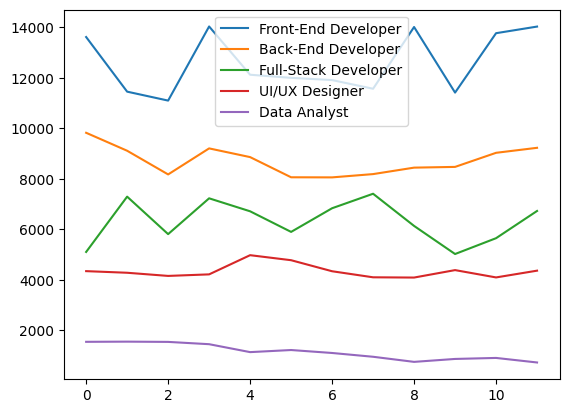

In [45]:
df_merge[top_5].plot(kind="line")